# Prediction of Obesity Levels 

## ABOUT THE DATASET 
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes.

The attributes related with eating habits are: 
* Frequent consumption of high caloric food (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH20)
* Consumption of alcohol (CALC). 

The attributes related with the physical condition are: 
* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Transportation used (MTRANS)

variables obtained :
* Gender 
* Age
* Height
* Weight.

Obesity Risk values are:
* Underweight Less than 18.5
* Normal 18.5 to 24.9
* Overweight 25.0 to 29.9
* Obesity I 30.0 to 34.9
* Obesity II 35.0 to 39.9
* Obesity III Higher than 40

In [2]:
#Import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [3]:
#load Data into a datafrakes 
data_one = pd.read_csv("ObesityDataSet.csv")
data_two = pd.read_csv("ObesityDataSettwo.csv")

#drop index column
data_two.drop("id",axis=1,inplace=True)

#Commine the two dataframe 
data = pd.concat([data_one,data_two], axis=0)

#Rename target column
data.rename(columns={'NObeyesdad': 'Obesity Level'}, inplace=True)

#Set pandas to display all columns 
pd.set_option('display.max_columns', None)

#show the first 5 rows 
print(data.shape)
data.head()

(22869, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Data Cleaning and EDA

In [4]:
#get more information about the dataset 
data["NCP"] = data["NCP"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22869 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  int32  
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             22869

* The dataset consist of both Numerical features and Catgerical features
* The dataset contains 17 features 
* The dataset contains 22869 rows

In [5]:
# Checking for missing values 
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Obesity Level                     0
dtype: int64

* There are no missing values in the dataset 

In [6]:
# Check if the dataset contains duplicate rows 
data.duplicated().sum()

30

In [7]:
# Drop duplicated values 
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [8]:
# Summary statistics of the Numerical features in the dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,22839.000000,22839.000000,22839.000000,22839.000000,22839.000000,22839.000000,22839.000000,22839.000000
mean,23.888604,1.700472,87.795556,2.443747,2.652174,2.027241,0.984597,0.620996
std,5.755249,0.087863,26.362595,0.533383,0.764871,0.608482,0.839754,0.602810
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.756506,0.015860,0.000000
50%,22.815416,1.700000,84.000000,2.393837,3.000000,2.000000,1.000000,0.582840
75%,26.000000,1.763029,111.531208,3.000000,3.000000,2.533690,1.600431,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


* We need to explore the Age column to check for outliers because the 3rd quantile is 26 and the max is 61 we need to know if the big are not outliers
* We also need to explore the Weight column to check for outliers because the 3rd quantile 111 is  and the max is 173 we need to know if the big are not outliers 
* We need to explore the NCP, FAF, and TUE columns 

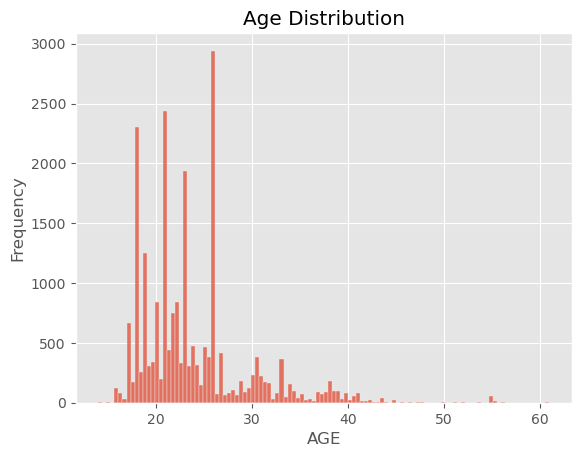

In [9]:
# Age feature distribution 
sns.histplot(data["Age"])
plt.title("Age Distribution")
plt.xlabel("AGE")
plt.ylabel("Frequency");

* The figure exhibits right skewness, indicating the presence of outliers on the right side. We need to investiage further if the ages above 45 are truly outliers

In [10]:
# Lets check if the age above 45 are outliers 
(data["Age"]>45).sum()/len(data)

0.004378475414860546

* Ages above 45 will be considers as outliers and will be romved from the dataset

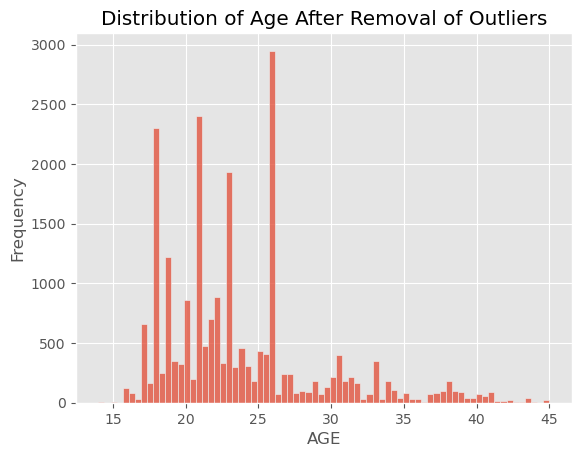

In [11]:
#Removing ages above 
data = data[data["Age"]<=45]
 
#Plotting the Age feature distribution again
sns.histplot(data["Age"])
plt.title("Distribution of Age After Removal of Outliers")
plt.xlabel("AGE")
plt.ylabel("Frequency");

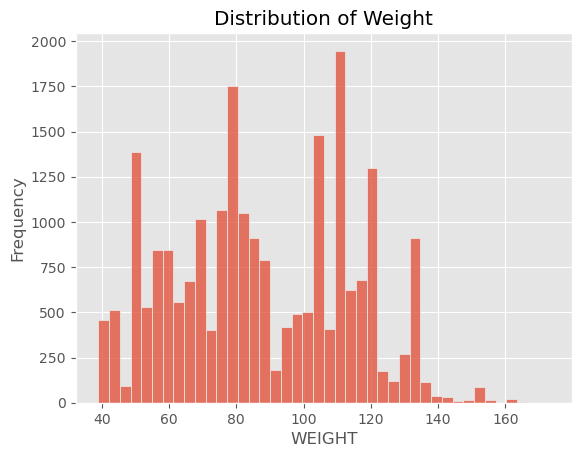

In [12]:
# Weight feature distribution 
sns.histplot(data["Weight"])
plt.title("Distribution of Weight")
plt.xlabel("WEIGHT")
plt.ylabel("Frequency");

* The Weight of most people in the dataset is between 40 to 160 (kg)

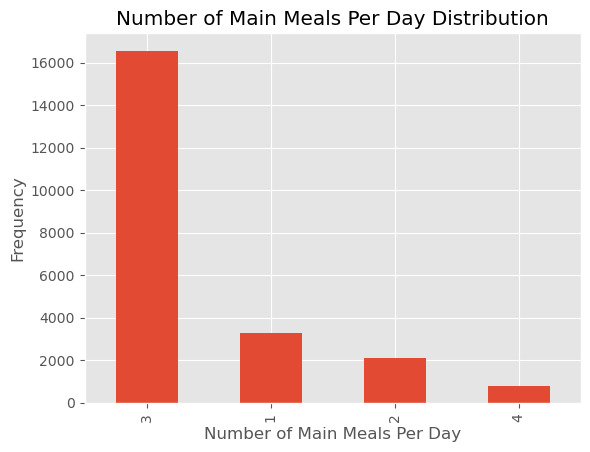

In [13]:
# Weight NCP distribution 
data["NCP"].value_counts().plot(kind="bar")
plt.title("Number of Main Meals Per Day Distribution")
plt.xlabel("Number of Main Meals Per Day")
plt.ylabel("Frequency");

* The majority of observations in the dataset indicate that individuals typically consume three meals per day.

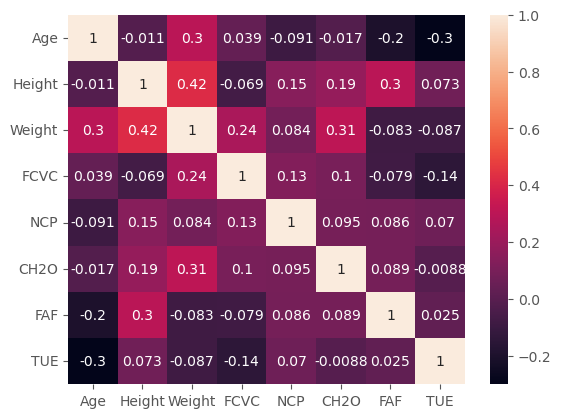

In [14]:
# Assessing the Correlation betweem the Numerical Features 
correlaton = data.select_dtypes("number").corr()

#Create an Heatmap to visualize the correlation 
sns.heatmap(correlaton,annot=True);

* There are no stong relationships between the numerical features in the dataset, as there are no correlatons above 0.4 in heatmap above.

In [15]:
data["Obesity Level"].value_counts(normalize=True)

Obesity Level
Obesity_Type_III       0.192181
Obesity_Type_II        0.155768
Normal_Weight          0.147764
Obesity_Type_I         0.142970
Insufficient_Weight    0.122609
Overweight_Level_II    0.120586
Overweight_Level_I     0.118123
Name: proportion, dtype: float64

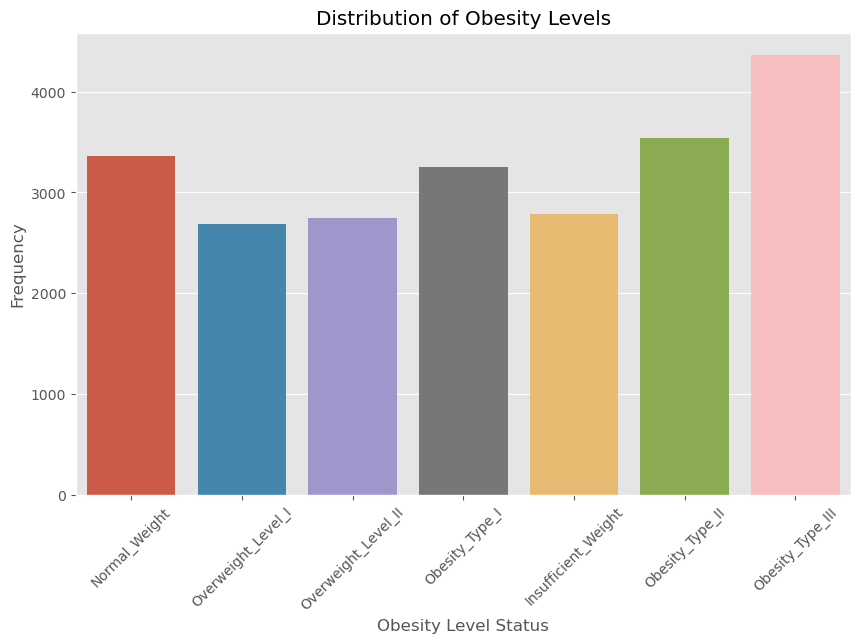

In [16]:
# Visualizing the class balance of the target feature 
plt.figure(figsize=(10, 6)) 
sns.countplot(data=data, x="Obesity Level")
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Level Status")
plt.ylabel("Frequency");

* The majority of individuals in the dataset exhibit Obesity Type III. 
* The category with the fewest instances is Overweight_Level_I. 
* While there is some class imbalance in the dataset, it is not severe enough to impede our analysis.

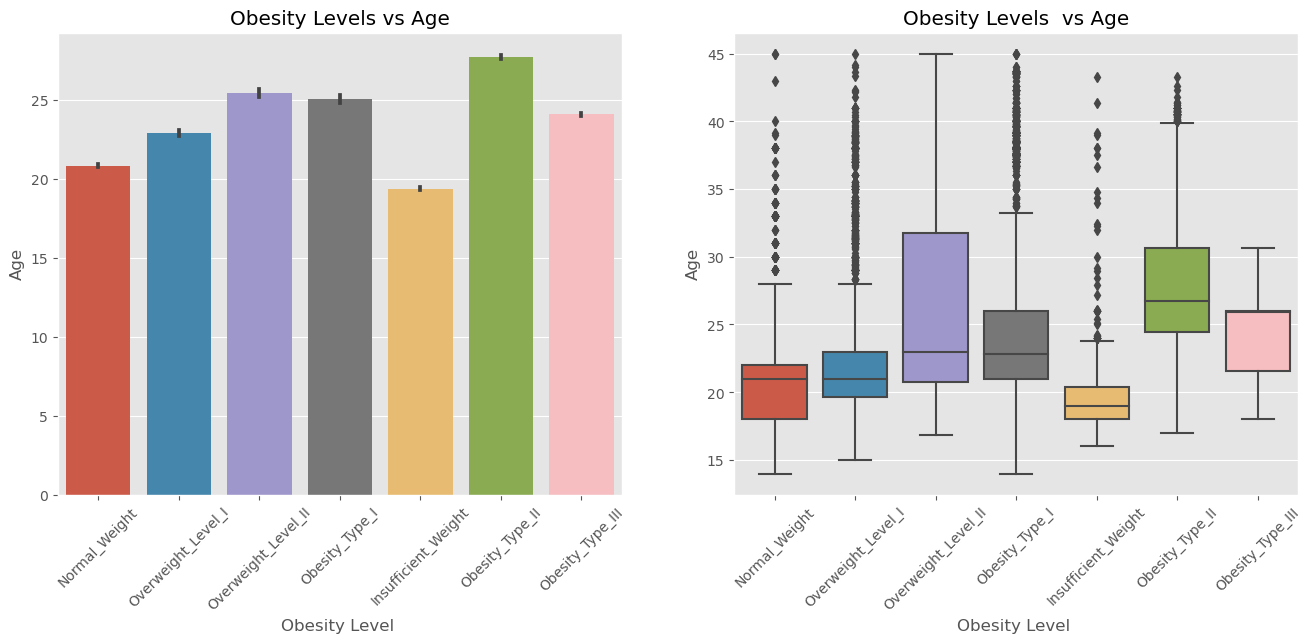

In [17]:
# Checking the distribution of the Obesity Risk Status over Age features

# Create a subplot to plot both graph on 
fig, axes =plt.subplots(1,2,figsize=(16,6))

# Create the first plot "barplot"
sns.barplot(data=data, x="Obesity Level",y="Age",ax=axes[0])
# Give it a title 
axes[0].set_title("Obesity Levels vs Age")

# Create the second plot "barplot"
sns.boxplot(data=data, x="Obesity Level",y="Age", ax=axes[1])
# Give it a title
axes[1].set_title("Obesity Levels  vs Age")

# Rotate the xlables 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Labelthe axis 
axes[0].set_xlabel("Obesity Level ")
axes[1].set_xlabel("Obesity Level ");

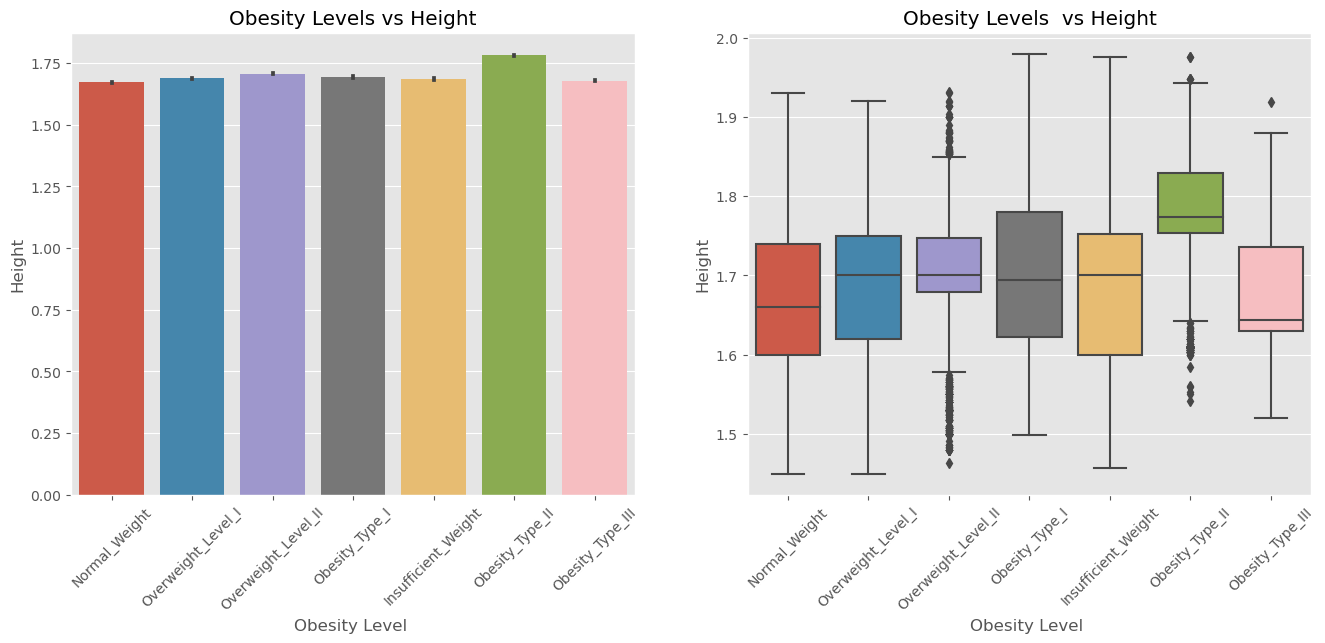

In [18]:
# Checking the distribution of the Obesity Risk Status over Height features

# Create a subplot to plot both graph on 
fig, axes =plt.subplots(1,2,figsize=(16,6))

# Create the first plot "barplot"
sns.barplot(data=data, x="Obesity Level",y="Height",ax=axes[0])
# Give it a title 
axes[0].set_title("Obesity Levels vs Height")

# Create the second plot "barplot"
sns.boxplot(data=data, x="Obesity Level",y="Height", ax=axes[1])
# Give it a title
axes[1].set_title("Obesity Levels  vs Height")

# Rotate the xlables 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Labelthe axis 
axes[0].set_xlabel("Obesity Level ")
axes[1].set_xlabel("Obesity Level ");

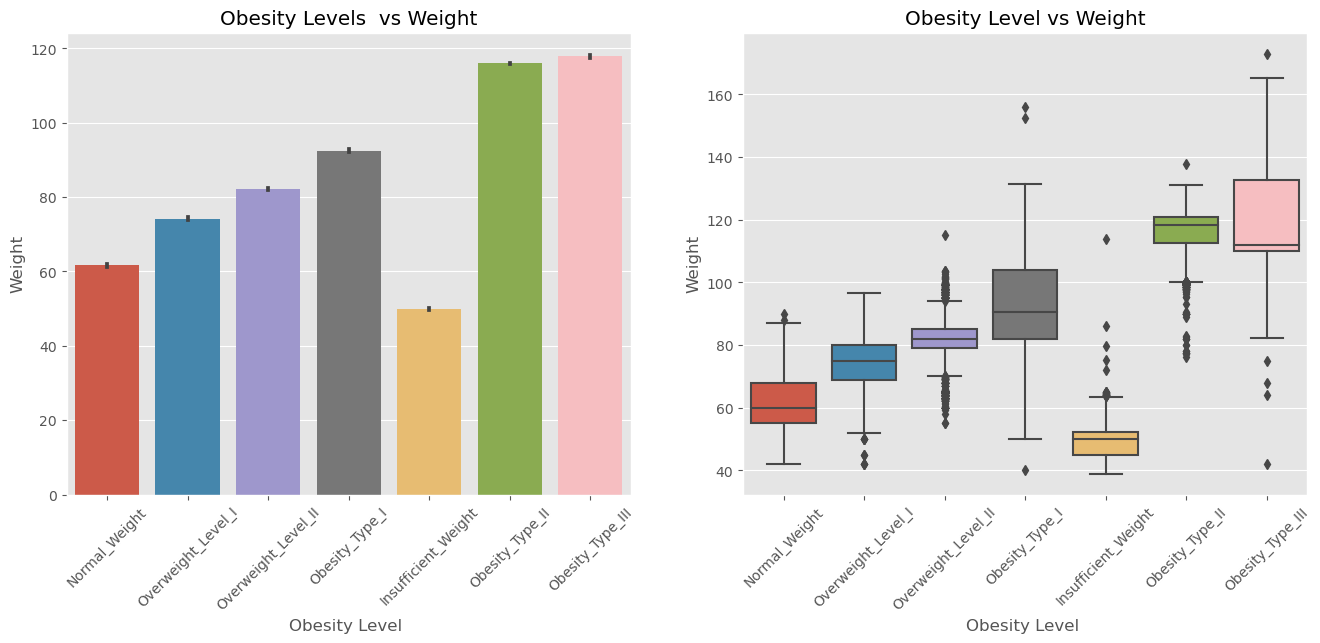

In [19]:
# Checking the distribution of the Obesity Risk Status over Weight features

# Create a subplot to plot both graph on 
fig, axes =plt.subplots(1,2,figsize=(16,6))

# Create the first plot "barplot"
sns.barplot(data=data, x="Obesity Level",y="Weight",ax=axes[0])
# Give it a title 
axes[0].set_title("Obesity Levels  vs Weight")

# Create the first plot "barplot"
sns.boxplot(data=data, x="Obesity Level",y="Weight", ax=axes[1])
# Give it a title
axes[1].set_title("Obesity Level vs Weight")

# Rotate the xlables 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Labelthe axis 
axes[0].set_xlabel("Obesity Level ")
axes[1].set_xlabel("Obesity Level ");

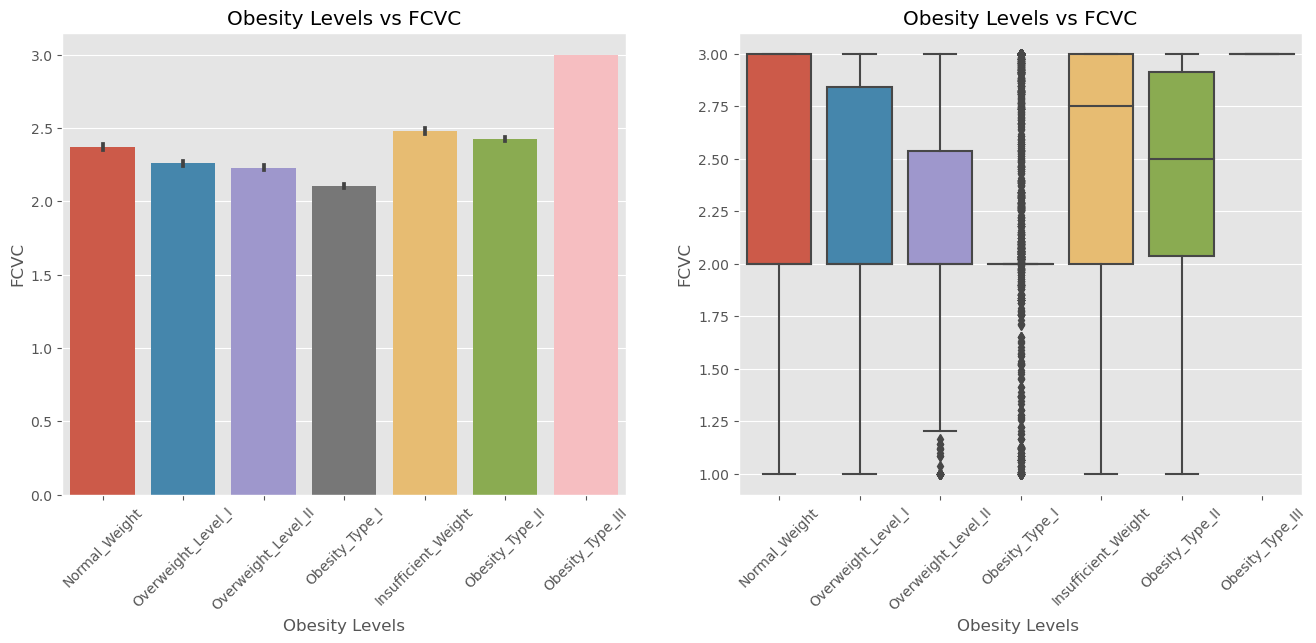

In [20]:
# Checking the distribution of the Obesity Risk Status over Frequency of consumption of vegetables feature

# Create a subplot to plot both graph on 
fig, axes =plt.subplots(1,2,figsize=(16,6))

# Create the first plot "barplot"
sns.barplot(data=data, x="Obesity Level",y="FCVC",ax=axes[0])
# Give it a title 
axes[0].set_title("Obesity Levels vs FCVC")

# Create the first plot "barplot"
sns.boxplot(data=data, x="Obesity Level",y="FCVC", ax=axes[1])
# Give it a title
axes[1].set_title("Obesity Levels vs FCVC")

# Rotate the xlables 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Labelthe axis 
axes[0].set_xlabel("Obesity Levels")
axes[1].set_xlabel("Obesity Levels ");

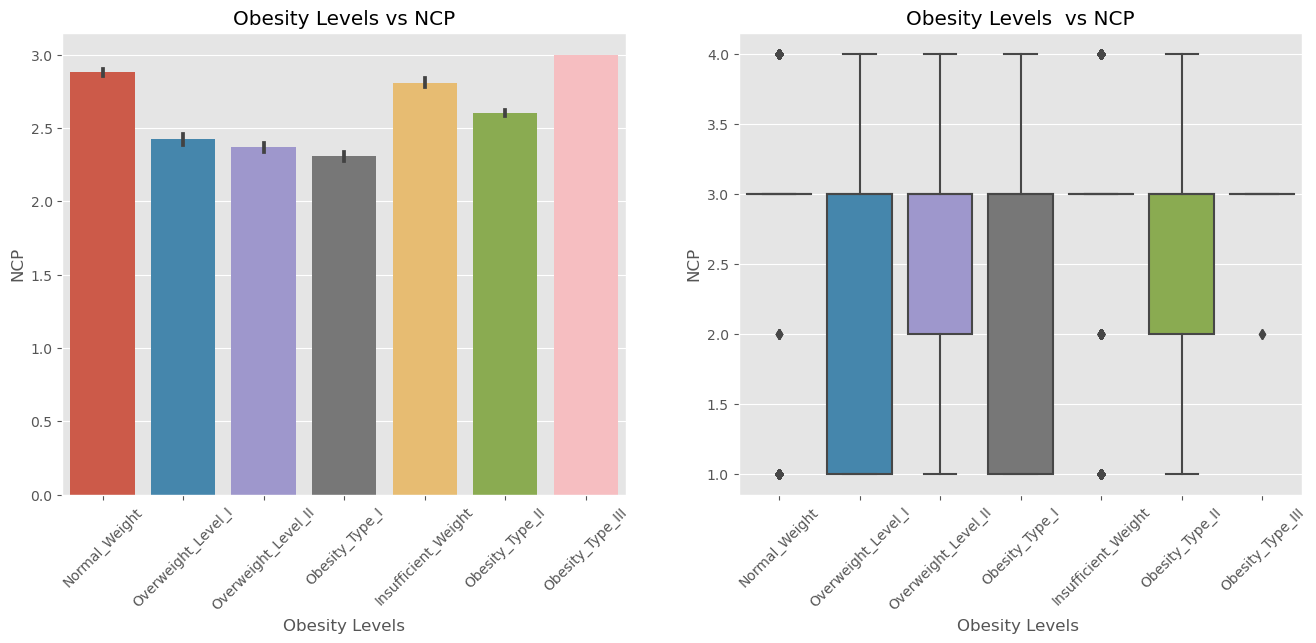

In [21]:
# Checking the distribution of the Obesity Risk Status over NCP features

# Create a subplot to plot both graph on 
fig, axes =plt.subplots(1,2,figsize=(16,6))

# Create the first plot "barplot"
sns.barplot(data=data, x="Obesity Level",y="NCP",ax=axes[0])
# Give it a title 
axes[0].set_title("Obesity Levels vs NCP")

# Create the first plot "barplot"
sns.boxplot(data=data, x="Obesity Level",y="NCP", ax=axes[1])
# Give it a title
axes[1].set_title("Obesity Levels  vs NCP")

# Rotate the xlables 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Labelthe axis 
axes[0].set_xlabel("Obesity Levels")
axes[1].set_xlabel("Obesity Levels ");

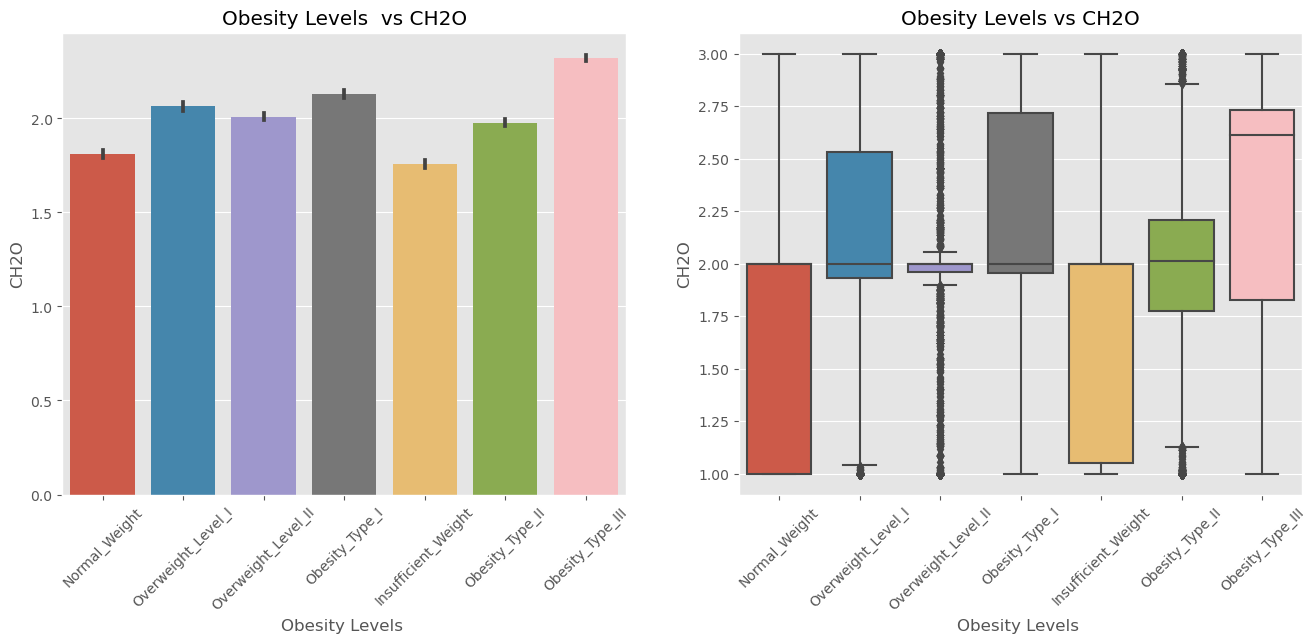

In [22]:
# Checking the distribution of the Obesity Risk Status over CH2O features

# Create a subplot to plot both graph on 
fig, axes =plt.subplots(1,2,figsize=(16,6))

# Create the first plot "barplot"
sns.barplot(data=data, x="Obesity Level",y="CH2O",ax=axes[0])
# Give it a title 
axes[0].set_title("Obesity Levels  vs CH2O")

# Create the first plot "barplot"
sns.boxplot(data=data, x="Obesity Level",y="CH2O", ax=axes[1])
# Give it a title
axes[1].set_title("Obesity Levels vs CH2O")

# Rotate the xlables 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Labelthe axis 
axes[0].set_xlabel("Obesity Levels ")
axes[1].set_xlabel("Obesity Levels ");

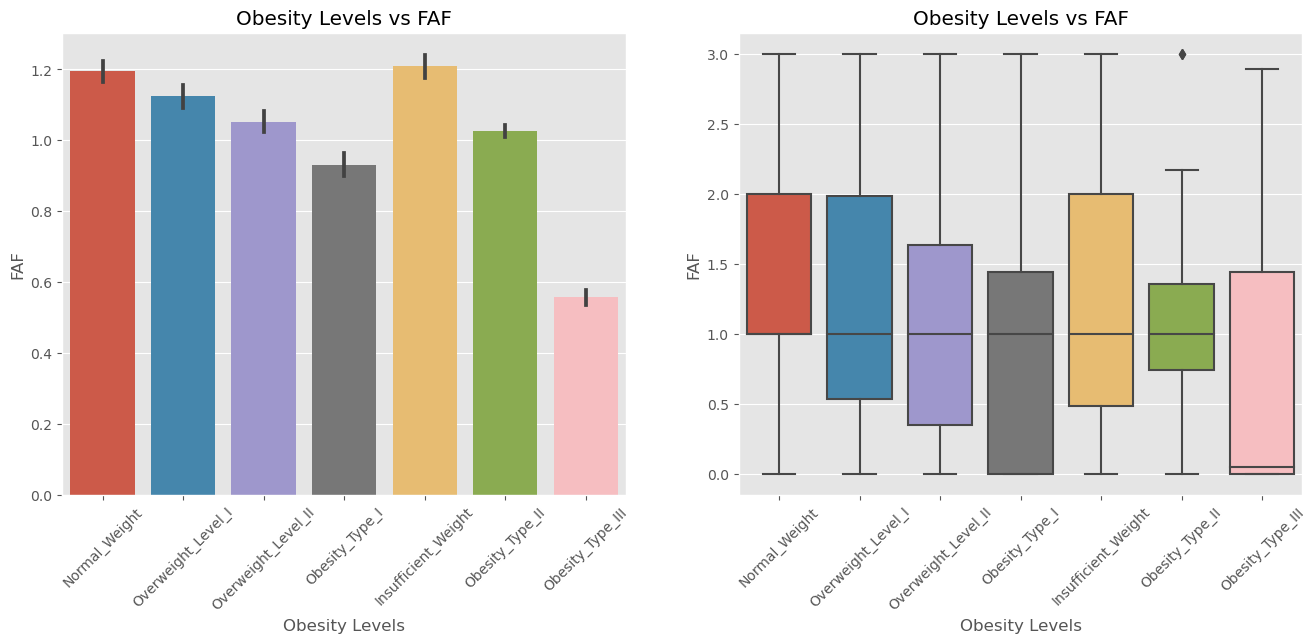

In [23]:
# Checking the distribution of the Obesity Risk Status over FAF features

# Create a subplot to plot both graph on 
fig, axes =plt.subplots(1,2,figsize=(16,6))

# Create the first plot "barplot"
sns.barplot(data=data, x="Obesity Level",y="FAF",ax=axes[0])
# Give it a title 
axes[0].set_title("Obesity Levels vs FAF")

# Create the first plot "barplot"
sns.boxplot(data=data, x="Obesity Level",y="FAF", ax=axes[1])
# Give it a title
axes[1].set_title("Obesity Levels vs FAF")

# Rotate the xlables 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Labelthe axis 
axes[0].set_xlabel("Obesity Levels")
axes[1].set_xlabel("Obesity Levels");

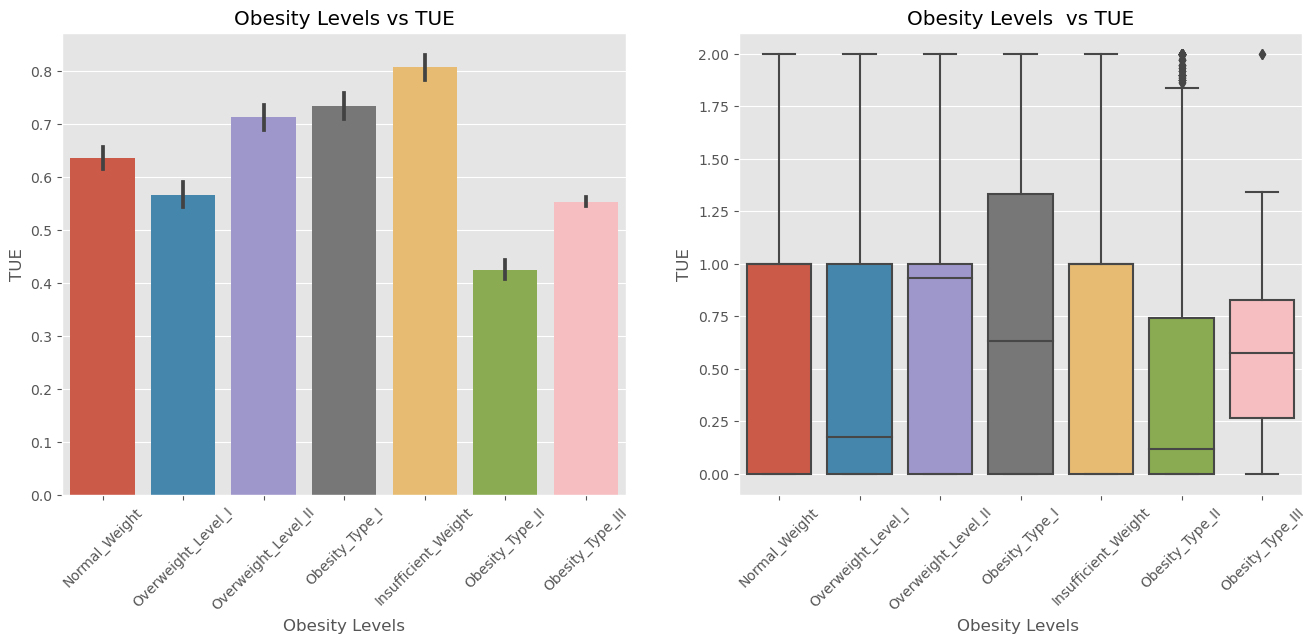

In [24]:
# Checking the distribution of the Obesity Risk Status over TUE features

# Create a subplot to plot both graph on 
fig, axes = plt.subplots(1,2,figsize=(16,6))

# Create the first plot "barplot"
sns.barplot(data=data, x="Obesity Level",y="TUE",ax=axes[0])
# Give it a title 
axes[0].set_title("Obesity Levels vs TUE")

# Create the first plot "barplot"
sns.boxplot(data=data, x="Obesity Level",y="TUE", ax=axes[1])
# Give it a title
axes[1].set_title("Obesity Levels  vs TUE")

# Rotate the xlables 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Labelthe axis 
axes[0].set_xlabel("Obesity Levels")
axes[1].set_xlabel("Obesity Levels ");

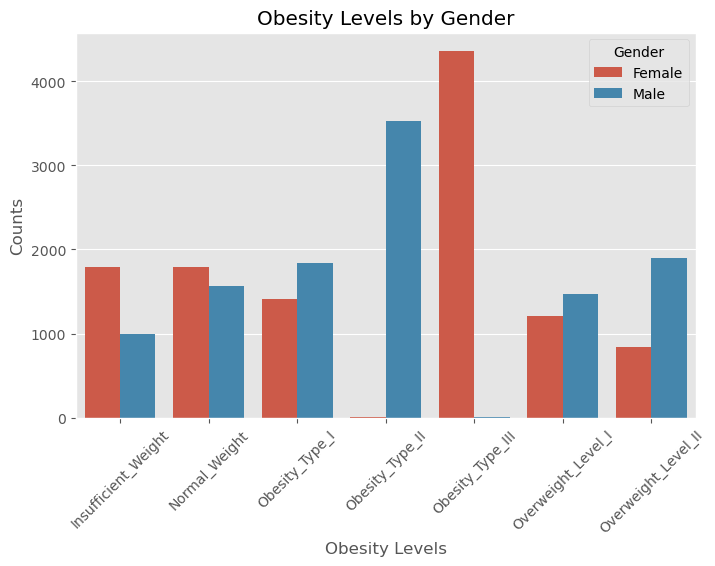

In [25]:
# Distribution of Obesity Status by Gender
OBG = data.groupby("Obesity Level")["Gender"].value_counts().rename("Counts").to_frame().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=OBG, x="Obesity Level", y ="Counts", hue="Gender")
plt.xticks(rotation=45)
plt.title("Obesity Levels by Gender")
plt.xlabel("Obesity Levels");

* Obesity Type II is prevalent among males and less prevalent among females, whereas Obesity Type III is more common among females and less common among males.

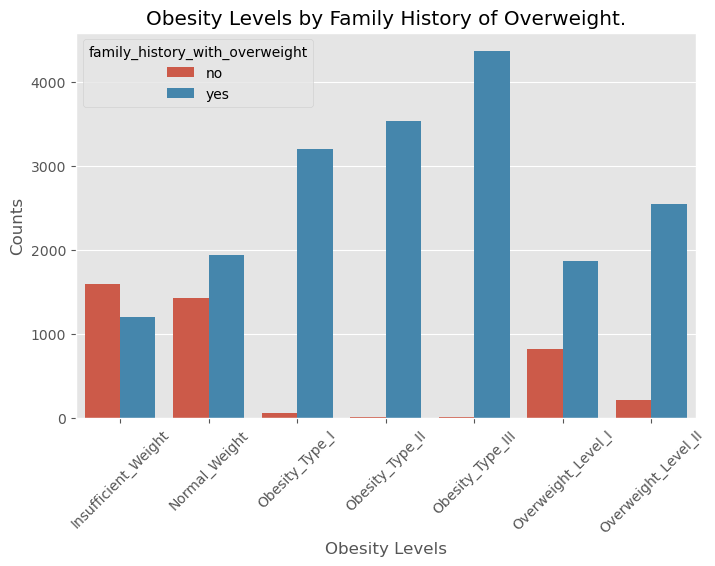

In [26]:
FHOW = data.groupby("Obesity Level")["family_history_with_overweight"].value_counts().rename("Counts").to_frame().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=FHOW, x="Obesity Level", y ="Counts", hue="family_history_with_overweight")
plt.xticks(rotation=45)
plt.title("Obesity Levels by Family History of Overweight.")
plt.xlabel("Obesity Levels");

* On average, individuals with a family history of overweight are more likely to develop obesity.  

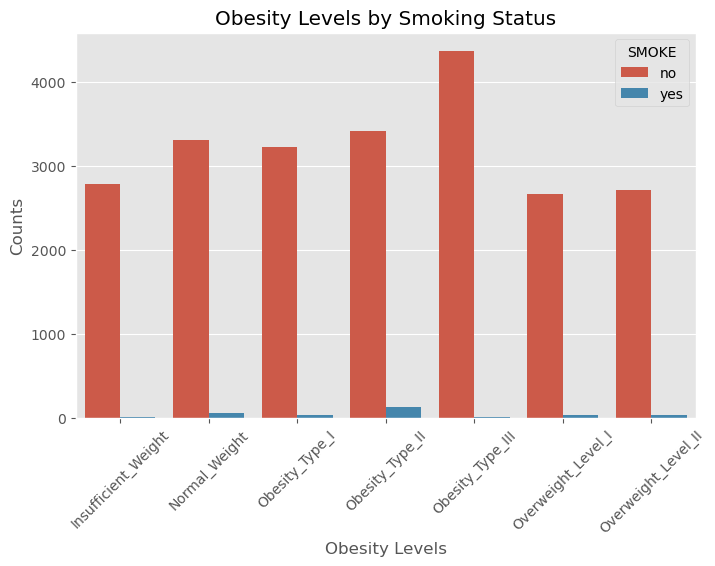

In [27]:
SOW = data.groupby("Obesity Level")["SMOKE"].value_counts().rename("Counts").to_frame().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=SOW, x="Obesity Level", y ="Counts", hue="SMOKE")
plt.xticks(rotation=45)
plt.title("Obesity Levels by Smoking Status")
plt.xlabel("Obesity Levels");

* The majority of data points in the dataset represents individuals who do not somke. 

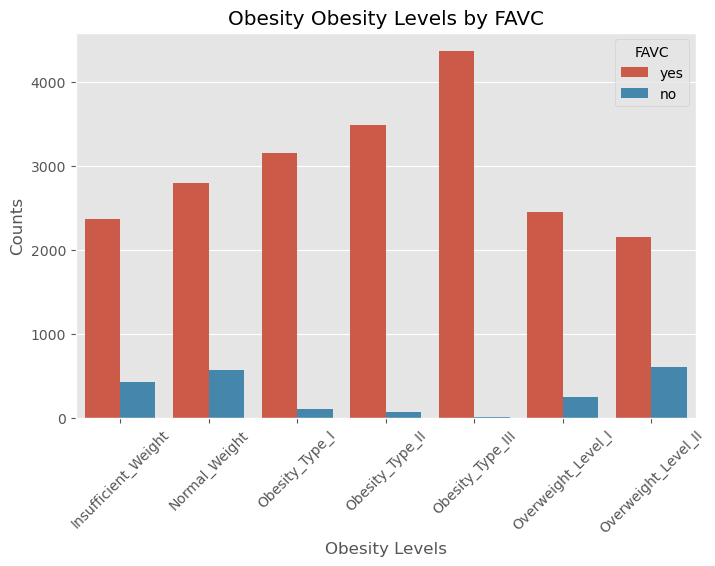

In [28]:
FAVC = data.groupby("Obesity Level")["FAVC"].value_counts().rename("Counts").to_frame().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=FAVC, x="Obesity Level", y ="Counts", hue="FAVC")
plt.xticks(rotation=45)
plt.title("Obesity Obesity Levels by FAVC")
plt.xlabel("Obesity Levels");

* Individuals who frequently consume high-calorie foods are at a greater risk of developing obesity.

In [29]:
# Checking for numerical feature that has high impact on the target varaible (obesity risk)

# Import the relavent library 
from scipy.stats import f_oneway

# Encode the Categorical feature 
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(data["Obesity Level"])

# Perform ANOVA test
for feature in data.select_dtypes("number").columns:
    f_statistic, p_value = f_oneway(data[feature],encoded_target)
    # Print if the feature is significant or not 
    if p_value < 0.05:
        print(f"{feature} has a significant impact on Obesity Levels")
    else:
        print(f"{feature} has no significant impact on Obesity LEvels")

Age has a significant impact on Obesity Levels
Height has a significant impact on Obesity Levels
Weight has a significant impact on Obesity Levels
FCVC has a significant impact on Obesity Levels
NCP has a significant impact on Obesity Levels
CH2O has a significant impact on Obesity Levels
FAF has a significant impact on Obesity Levels
TUE has a significant impact on Obesity Levels


* All of the numerical features exhibit a notable influence on the target variable (Obesity Risk)

In [30]:
# Checking for categorical  feature that has high impact on the target varaible (obesity risk)

# Import the relavent library 
from scipy.stats import chi2_contingency


for feature in data.select_dtypes(object).columns:
    # Create a contingency table
    contingency_table = pd.crosstab(data["Obesity Level"], data[feature])
    
    # Perform chi-square test
    chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Print if the feature is significant or not 
    if p_value < 0.05:
        print(f"{feature} has a significant impact on Obesity Levels")
    else:
        print(f"{feature} has no significant impact on Obesity Levels")
    

Gender has a significant impact on Obesity Levels
family_history_with_overweight has a significant impact on Obesity Levels
FAVC has a significant impact on Obesity Levels
CAEC has a significant impact on Obesity Levels
SMOKE has a significant impact on Obesity Levels
SCC has a significant impact on Obesity Levels
CALC has a significant impact on Obesity Levels
MTRANS has a significant impact on Obesity Levels
Obesity Level has a significant impact on Obesity Levels


* All the categorical features has an impact on the target variable (Obesity Risk)

## Data Transformation and Preprocessing  

In [31]:
# Spltitng the dataset into feature matrix and target vector 
X = data.drop(["Obesity Level"],axis=1)
y = data["Obesity Level"]
print(X.shape)
print(y.shape)

(22739, 16)
(22739,)


In [32]:
X_cat = X.select_dtypes(object)
X_num = X.select_dtypes("number")

In [33]:
# Encode the Categorical features
for feature in X_cat.columns:
    Encoder = LabelEncoder()
    X[feature] = Encoder.fit_transform(X[feature])
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1,2,0,2.0,0,0.0,0.0,2,3


In [34]:
# Standardize Features
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
# Return the standardize data into a dataframe  
X_scaled = pd.DataFrame(columns=X.columns, data=X_scaled)
X_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,-0.995305,-0.508942,-0.915400,-0.902140,0.468590,-3.221937,-0.832373,0.454757,0.336002,-0.112461,-0.045580,-0.188469,-1.172531,0.626154,1.622859,0.431135
1,-0.995305,-0.508942,-2.052065,-1.205055,0.468590,-3.221937,1.041436,0.454757,0.336002,8.891957,1.597064,5.305899,2.400546,-1.033320,-0.474572,0.431135
2,1.004717,-0.140052,1.130598,-0.409902,0.468590,-3.221937,-0.832373,0.454757,0.336002,-0.112461,-0.045580,-0.188469,1.209520,0.626154,-2.572002,0.431135
3,1.004717,0.597727,1.130598,-0.031258,-2.134063,-3.221937,1.041436,0.454757,0.336002,-0.112461,-0.045580,-0.188469,1.209520,-1.033320,-2.572002,1.299169
4,1.004717,-0.324497,0.903265,0.074762,-2.134063,-3.221937,-0.832373,-2.158846,0.336002,-0.112461,-0.045580,-0.188469,-1.172531,-1.033320,-0.474572,0.431135


In [35]:
# Spltitng the dataset into the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=3)
print(f"The X_train size is {X_train.shape} and the y_train size is {y_train.shape}")
print(f"The X_test size is {X_test.shape} and the y_test size is {y_test.shape}")

The X_train size is (18191, 16) and the y_train size is (18191,)
The X_test size is (4548, 16) and the y_test size is (4548,)


# Model Building 

In [36]:
# Baseline Model 
# We are employing a Logistic Regression Model as a baseline to evaluate the performance of other models. 

# Instantiate a Multinomial Logistic Regression Model 
LR_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
LR_model.fit(X_train, y_train)

# Make Predictions 
lr_y_train_pred = LR_model.predict(X_train)
lr_y_test_pred =  LR_model.predict(X_test)

#Accuracy score of the model
acc_score_lr_model_train = accuracy_score(y_train, lr_y_train_pred)
acc_score_lr_model_test = accuracy_score(y_test, lr_y_test_pred)

#Print the accuracy score of the model
print(f"The accuracy score of the baseline model on the train set is {round(acc_score_lr_model_train * 100,2)}")
print(f"The accuracy score of the baseline model on the test set is  {round(acc_score_lr_model_test * 100,2)}")



The accuracy score of the baseline model on the train set is 86.62
The accuracy score of the baseline model on the test set is  87.01


* The baseline model achieved an accuracy score of 86.6% on the training set and 87% on the test set. This suggests that any model performing below this baseline is considered underperforming in this contest 

## DECISION TREE CLASSIFIER 

In [37]:
# Import the relevant library 
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model 
dtc_model = DecisionTreeClassifier(random_state=45)

# Train the model 
dtc_model.fit(X_train,y_train)

# Make Predictions 
dtc_y_train_pred = dtc_model.predict(X_train)
dtc_y_test_pred =  dtc_model.predict(X_test)

#Accuracy score of the modelas
acc_score_dtc_model_train = accuracy_score(y_train, dtc_y_train_pred)
acc_score_dtc_model_test = accuracy_score(y_test, dtc_y_test_pred)

#Print the accuracy score of the model
print(f"The accuracy score of the Decision Tree model on the train set is {round(acc_score_dtc_model_train * 100,2)}")
print(f"The accuracy score of the Decision Tree model on the test set is  {round(acc_score_dtc_model_test * 100,2)}")

The accuracy score of the Decision Tree model on the train set is 99.98
The accuracy score of the Decision Tree model on the test set is  86.39


In [38]:
# Print the classification report of the decision tree model on the train set
print(classification_report(y_train, dtc_y_train_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00      2233
      Normal_Weight       1.00      1.00      1.00      2700
     Obesity_Type_I       1.00      1.00      1.00      2602
    Obesity_Type_II       1.00      1.00      1.00      2817
   Obesity_Type_III       1.00      1.00      1.00      3467
 Overweight_Level_I       1.00      1.00      1.00      2145
Overweight_Level_II       1.00      1.00      1.00      2227

           accuracy                           1.00     18191
          macro avg       1.00      1.00      1.00     18191
       weighted avg       1.00      1.00      1.00     18191



In [39]:
# Print the classification report of the decision tree model on the test set 
print(classification_report(y_test, dtc_y_test_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.89      0.90       555
      Normal_Weight       0.82      0.82      0.82       660
     Obesity_Type_I       0.82      0.87      0.84       649
    Obesity_Type_II       0.96      0.94      0.95       725
   Obesity_Type_III       1.00      0.99      1.00       903
 Overweight_Level_I       0.73      0.71      0.72       541
Overweight_Level_II       0.71      0.72      0.71       515

           accuracy                           0.86      4548
          macro avg       0.85      0.85      0.85      4548
       weighted avg       0.86      0.86      0.86      4548



* Obesity Type II and III: These categories have the highest precision, recall, and F1-score, indicating the model is very good at classifying these data points correctly.
* Insufficient Weight, Normal Weight, and Obesity Type I: The model also demonstrates strong performance in these categories, although the metrics are slightly lower compared to the higher obesity types. Nonetheless, it maintains reliable precision, recall, and F1-score.
* Overweight Level I and II: These categories have the lowest metrics across the board. The model is less certain about classifying these data points.

In [40]:
# Performing hyperparameter tunning for the decion tree model

#hyperparameters and their values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 11, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,3,5],
    'max_features': [10,20,30],
}
# Instantiate a Grid Search CV
dtc_grid_search = GridSearchCV(estimator=dtc_model, param_grid=param_grid, cv=5, scoring='accuracy')

#Train the model
dtc_grid_search.fit(X_train, y_train)

# Print best params 
print(f"The best params are {dtc_grid_search.best_params_}")

# Make Predictions 
dtc_grid_search_y_train_pred = dtc_grid_search.predict(X_train)
dtc_grid_search_y_test_pred =  dtc_grid_search.predict(X_test)

#Accuracy score of the model
acc_score_dtc_grid_search_model_train = accuracy_score(y_train, dtc_grid_search_y_train_pred)
acc_score_dtc_grid_search_model_test = accuracy_score(y_test, dtc_grid_search_y_test_pred)

#Print the accuracy score of the model
print(f"The accuracy score of the Decision Tree model (GridSearchCV) on the train set is {round(acc_score_dtc_grid_search_model_train * 100,2)}")
print(f"The accuracy score of the Decision Tree model (GridSearchCV) on the test set is  {round(acc_score_dtc_grid_search_model_test * 100,2)}")


The best params are {'criterion': 'entropy', 'max_depth': 8, 'max_features': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
The accuracy score of the Decision Tree model (GridSearchCV) on the train set is 89.31
The accuracy score of the Decision Tree model (GridSearchCV) on the test set is  88.9


In [41]:
# Print the classification report of the decision tree model (GridSearchCV) on the train set
print(classification_report(y_train, dtc_grid_search_y_train_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.95      0.92      2233
      Normal_Weight       0.84      0.83      0.84      2700
     Obesity_Type_I       0.89      0.89      0.89      2602
    Obesity_Type_II       0.96      0.98      0.97      2817
   Obesity_Type_III       1.00      1.00      1.00      3467
 Overweight_Level_I       0.76      0.74      0.75      2145
Overweight_Level_II       0.82      0.80      0.81      2227

           accuracy                           0.89     18191
          macro avg       0.88      0.88      0.88     18191
       weighted avg       0.89      0.89      0.89     18191



After performing hyperparameter tunning for decision tree, for the train set we have:
* Insufficient Weight: The precision, recall, and F1-score have improved slightly, indicating that the model is now even better at accurately classifying instances of insufficient weight.

* Normal Weight: There's a minor improvement in precision, while recall and F1-score remain relatively stable. The model maintains its effectiveness in identifying normal weight instances.

* Obesity Type I: Precision, recall, and F1-score remain consistent with a slight increase in precision. The model continues to perform well in classifying instances of obesity type I.

* Obesity Type II: Precision, recall, and F1-score have all improved noticeably. The model now demonstrates even greater accuracy in classifying instances of obesity type II.

* Obesity Type III: Precision, recall, and F1-score remain perfect, indicating that the model excels in identifying instances of obesity type III.

* Overweight Level I: Precision, recall, and F1-score have seen slight improvements. The model's performance in classifying instances of overweight level I has been enhanced.

* Overweight Level II: There are slight improvements in precision, recall, and F1-score. The model's accuracy in identifying instances of overweight level II has been slightly boosted.

In [42]:
# Print the classification report of the decision tree model (GridSearchCV) on the test set
print(classification_report(y_test, dtc_grid_search_y_test_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.94      0.92       555
      Normal_Weight       0.84      0.83      0.83       660
     Obesity_Type_I       0.87      0.91      0.89       649
    Obesity_Type_II       0.96      0.97      0.97       725
   Obesity_Type_III       1.00      1.00      1.00       903
 Overweight_Level_I       0.76      0.75      0.75       541
Overweight_Level_II       0.81      0.72      0.76       515

           accuracy                           0.89      4548
          macro avg       0.87      0.87      0.87      4548
       weighted avg       0.89      0.89      0.89      4548



After performing hyperparameter tunning for decision tree, for the test set we have:
* Insufficient Weight: The precision, recall, and F1-score remain relatively stable compared to the training report, indicating consistent performance in classifying instances of insufficient weight.

* Normal Weight: Precision and recall are consistent, while there's a slight decrease in the F1-score. Nonetheless, the model maintains its effectiveness in identifying normal weight instances.

* Obesity Type I: Precision, recall, and F1-score have seen minor changes, with a slight decrease in recall. Overall, the model continues to perform well in classifying instances of obesity type I.

* Obesity Type II: Precision, recall, and F1-score remain consistent with the training report. The model demonstrates continued accuracy in classifying instances of obesity type II.

* Obesity Type III: Precision, recall, and F1-score remain perfect, indicating consistent excellence in identifying instances of obesity type III.

* Overweight Level I: Precision and recall are stable, while there's a slight increase in the F1-score compared to the training  report. The model's performance in classifying instances of overweight level I remains consistent.

* Overweight Level II: Precision has slightly decreased, while recall and F1-score have seen slight improvements. The model's accuracy in identifying instances of overweight level II has slightly increased compared to the training report.

## Gradient Boosting Classifier 

In [43]:
# Import the relevant library 
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model 
gbc_model = GradientBoostingClassifier(random_state=45)

# Train the model 
gbc_model.fit(X_train,y_train)

# Make Predictions 
gbc_y_train_pred = gbc_model.predict(X_train)
gbc_y_test_pred =  gbc_model.predict(X_test)

#Accuracy score of the model
acc_score_gbc_model_train = accuracy_score(y_train, gbc_y_train_pred)
acc_score_gbc_model_test = accuracy_score(y_test, gbc_y_test_pred)

#Print the accuracy score of the model
print(f"The accuracy score of the Gradient Boosting Classifier model on the train set is {round(acc_score_gbc_model_train * 100,2)}")
print(f"The accuracy score of the Gradient Boosting Classifier model on the test set is  {round(acc_score_gbc_model_test * 100,2)}")


The accuracy score of the Gradient Boosting Classifier model on the train set is 92.42
The accuracy score of the Gradient Boosting Classifier model on the test set is  91.27


* There is a significant improvement in this model performance compared to the decion tree model 

In [44]:
# Print the classification report of the Gradient Boosting model on the train set
print(classification_report(y_train, gbc_y_train_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.95      2233
      Normal_Weight       0.89      0.90      0.90      2700
     Obesity_Type_I       0.92      0.91      0.92      2602
    Obesity_Type_II       0.97      0.98      0.98      2817
   Obesity_Type_III       1.00      1.00      1.00      3467
 Overweight_Level_I       0.85      0.81      0.83      2145
Overweight_Level_II       0.84      0.86      0.85      2227

           accuracy                           0.92     18191
          macro avg       0.92      0.92      0.92     18191
       weighted avg       0.92      0.92      0.92     18191



* Insufficient Weight: The precision, recall, and F1-score are all high, indicating that the model effectively classifies instances of insufficient weight with accuracy.

* Normal Weight: Precision, recall, and F1-score are also high, showing that the model performs well in identifying normal weight instances.

* Obesity Type I: Precision, recall, and F1-score are all at a high level, indicating strong performance in classifying instances of obesity type I.

* Obesity Type II: Precision, recall, and F1-score are all excellent, demonstrating the model's effectiveness in identifying instances of obesity type II.

* Obesity Type III: Precision, recall, and F1-score remain perfect, indicating flawless performance in identifying instances of obesity type III.

* Overweight Level I: Precision, recall, and F1-score are all relatively high, showing the model's ability to classify instances of overweight level I accurately.

* Overweight Level II: Precision, recall, and F1-score are all high, indicating effective performance in identifying instances of overweight level II.

In [45]:
# Print the classification report of the Gradient Boosting model on the test set
print(classification_report(y_test, gbc_y_test_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94       555
      Normal_Weight       0.88      0.89      0.88       660
     Obesity_Type_I       0.88      0.93      0.90       649
    Obesity_Type_II       0.98      0.97      0.97       725
   Obesity_Type_III       1.00      1.00      1.00       903
 Overweight_Level_I       0.81      0.81      0.81       541
Overweight_Level_II       0.84      0.78      0.81       515

           accuracy                           0.91      4548
          macro avg       0.90      0.90      0.90      4548
       weighted avg       0.91      0.91      0.91      4548



* Insufficient Weight: The precision, recall, and F1-score are all high, indicating that the model effectively classifies instances of insufficient weight with accuracy, consistent with the performance on the train set.

* Normal Weight: Precision, recall, and F1-score are also high, showing that the model maintains its effectiveness in identifying normal weight instances.

* Obesity Type I: Precision, recall, and F1-score are all at a high level, indicating strong performance in classifying instances of obesity type I, similar to the train set.

* Obesity Type II: Precision, recall, and F1-score are all excellent, demonstrating the model's effectiveness in identifying instances of obesity type II, consistent with its performance on the train set.

* Obesity Type III: Precision, recall, and F1-score remain perfect, indicating flawless performance in identifying instances of obesity type III, consistent with the train set.

* Overweight Level I: Precision, recall, and F1-score are all relatively high, showing the model's ability to classify instances of overweight level I accurately, similar to the train set.

* Overweight Level II: Precision, recall, and F1-score are all high, indicating effective performance in identifying instances of overweight level II, although there's a slight decrease in recall compared to the train set.

# XGBOOST Classifier

In [46]:
# Import relevant libraries 
import xgboost as xgb

# Instantiate the model 
xgb_model = xgb.XGBClassifier(objective='multi:softmax')

# Encode the labels
encoded_labels = Encoder.fit_transform(y_train)

# Train the model 
xgb_model.fit(X_train,Encoder.fit_transform(y_train))

# Make Predictions 
xgb_y_train_pred = xgb_model.predict(X_train)
xgb_y_test_pred =  xgb_model.predict(X_test)

#Accuracy score of the model
acc_score_xgb_model_train = accuracy_score(Encoder.fit_transform(y_train), xgb_y_train_pred)
acc_score_xgb_model_test  = accuracy_score(Encoder.fit_transform(y_test), xgb_y_test_pred)

#Print the accuracy score of the model
print(f"The accuracy score of the XGBClassifier model on the train set is {round(acc_score_xgb_model_train * 100,2)}")
print(f"The accuracy score of the XGBClassifier model on the test set is  {round(acc_score_xgb_model_test * 100,2)}")

The accuracy score of the XGBClassifier model on the train set is 98.56
The accuracy score of the XGBClassifier model on the test set is  91.69


In [47]:
# Print the values each eocoded label denote 
label_mapping = dict(zip(Encoder.classes_, Encoder.transform(Encoder.classes_)))
print(label_mapping)

{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [48]:
# Print the classification report of the XGBClassifier model on the train set
print(classification_report(Encoder.fit_transform(y_train), xgb_y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2233
           1       0.97      0.98      0.98      2700
           2       0.99      0.99      0.99      2602
           3       1.00      1.00      1.00      2817
           4       1.00      1.00      1.00      3467
           5       0.97      0.95      0.96      2145
           6       0.97      0.98      0.97      2227

    accuracy                           0.99     18191
   macro avg       0.98      0.98      0.98     18191
weighted avg       0.99      0.99      0.99     18191



Here's the classification report for the train set using the XGBoost classifier model:

* Insufficient_Weight: The precision, recall, and F1-score are all high, indicating that the model effectively classifies instances belonging to class Insufficient_Weight with accuracy.

* Normal_Weight: Precision, recall, and F1-score are also high, showing that the model maintains its effectiveness in identifying instances belonging to class Normal_Weight.

* Obesity_Type_I: Precision, recall, and F1-score are all at a high level, indicating strong performance in classifying instances belonging to class Obesity_Type_I.

* Obesity_Type_II: Precision, recall, and F1-score are all excellent, demonstrating the model's effectiveness in identifying instances belonging to class Obesity_Type_II.

* Obesity_Type_III: Precision, recall, and F1-score remain perfect, indicating flawless performance in identifying instances belonging to Obesity_Type_III.

* Overweight_Level_I: Precision, recall, and F1-score are relatively high, showing the model's ability to classify instances belonging to class Overweight_Level_I accurately.

* Overweight_Level_II: Precision, recall, and F1-score are all high, indicating effective performance in identifying instances belonging to class Overweight_Level_II.

In [49]:
# Print the classification report of the XGBClassifier model on the test set
print(classification_report(Encoder.fit_transform(y_test), xgb_y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       555
           1       0.88      0.90      0.89       660
           2       0.90      0.92      0.91       649
           3       0.98      0.97      0.98       725
           4       1.00      1.00      1.00       903
           5       0.81      0.81      0.81       541
           6       0.83      0.80      0.81       515

    accuracy                           0.92      4548
   macro avg       0.91      0.91      0.91      4548
weighted avg       0.92      0.92      0.92      4548



Here's the classification report for the test set using the XGBoost classifier model:

* Insufficient_Weight: The precision, recall, and F1-score are all high, indicating that the model effectively classifies instances belonging to class Insufficient_Weight with accuracy.

* Normal_Weight: Precision, recall, and F1-score are also high, showing that the model maintains its effectiveness in identifying instances belonging to class Normal_Weight.

* Obesity_Type_I: Precision, recall, and F1-score are all at a high level, indicating strong performance in classifying instances belonging to Obesity_Type_I.

* Obesity_Type_II: Precision, recall, and F1-score are excellent, demonstrating the model's effectiveness in identifying instances belonging to Obesity_Type_II.

* Obesity_Type_III: Precision, recall, and F1-score remain perfect, indicating flawless performance in identifying instances belonging to Obesity_Type_III.

* Overweight_Level_I: Precision, recall, and F1-score are relatively high, showing the model's ability to classify instances belonging to Overweight_Level_I accurately.

* Overweight_Level_II: Precision, recall, and F1-score are all high, indicating effective performance in identifying instances belonging to class Overweight_Level_II.

# Cross Validation

In [57]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb_model, X_scaled, Encoder.fit_transform(y), cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", round(scores.mean(),2))


Cross-validation scores: [0.90853122 0.91116974 0.90633245 0.91292876 0.91642841]
Mean accuracy: 0.91


### Result 
* The XGBoost Classifier Model stands out as the top performer, achieving a remarkable accuracy score of 98% on the training set and 92% on the test set. It consistently demonstrated high effectiveness in classifying instances across all classes. Notably, the model achieved precision, recall, and F1-scores above 80% for all classes on the test set, showcasing its robust performance. Given its exceptional performance, this model is deemed suitable for deployment.